### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.head(len(tienda3))

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Dashboards con Power BI,Libros,26700.0,2100.0,21/10/2022,Ángel Rodriguez,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2355,Dashboards con Power BI,Libros,31800.0,2200.0,23/06/2022,Blanca Ramirez,Pereira,5,Tarjeta de crédito,1,4.81333,-75.69611
2356,Silla de oficina,Muebles,477100.0,25600.0,19/02/2023,Camila Rivera,Cartagena,5,Tarjeta de crédito,3,10.39972,-75.51444
2357,Mesa de centro,Muebles,123100.0,4700.0,19/09/2021,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175


#1. Análisis de facturación



In [ ]:
from matplotlib import pyplot as plt
ingreso_tienda = int(tienda['Precio'].sum())
ingreso_tienda2 = int(tienda2['Precio'].sum())
ingreso_tienda3 = int(tienda3['Precio'].sum())
ingreso_tienda4 = int(tienda4['Precio'].sum())
nombres_tiendas= ["Tienda1","Tienda2","Tienda3","Tienda4"]
ingresos_tiendas=[ingreso_tienda,ingreso_tienda2,ingreso_tienda3,ingreso_tienda4]
resultados_ventas = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Ingreso Total': ingresos_tiendas
})
resultados_ventas


,Tienda,Ingreso Total
0,Tienda1,1150880400
1,Tienda2,1116343500
2,Tienda3,1098019600
3,Tienda4,1038375700


# 2. Ventas por categoría

In [ ]:
import pandas as pd
tiendas_arreglo = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
resultados_categorias = []
for i in range(len(tiendas_arreglo)):
    categorias = tiendas_arreglo[i].groupby("Categoría del Producto").agg(
        ventas_categoria_tienda=("Precio", "sum"),
        contador_productos_tienda=("Categoría del Producto", "count")
    ).reset_index()
    categorias['Tienda'] = nombres_tiendas[i]
    resultados_categorias.append(categorias)
df_resultados = pd.concat(resultados_categorias)
df_resultados = df_resultados.sort_values(by='contador_productos_tienda', ascending=False)
df_resultados


,Categoría del Producto,ventas_categoria_tienda,contador_productos_tienda,Tienda
7,Muebles,201072100.0,499,Tienda 3
7,Muebles,192528900.0,480,Tienda 4
7,Muebles,187633700.0,465,Tienda 1
3,Electrónicos,409476100.0,451,Tienda 4
3,Electrónicos,410775800.0,451,Tienda 3
3,Electrónicos,429493500.0,448,Tienda 1
7,Muebles,176426300.0,442,Tienda 2
3,Electrónicos,410831100.0,422,Tienda 2
5,Juguetes,20262200.0,338,Tienda 4
5,Juguetes,17995700.0,324,Tienda 1


# 3. Calificación promedio de la tienda


In [ ]:
tiendas_arreglo = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificaciones_tiendas =[x["Calificación"].mean() for x in tiendas_arreglo]
calificacion_clientes = pd.DataFrame({
  "Tienda": nombres_tiendas,
  "Calificacion": calificaciones_tiendas

})
calificacion_clientes


,Tienda,Calificacion
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


In [ ]:
tiendas_arreglo = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificacion_por_tienda =[]
for i in range (len(tiendas_arreglo)):
  tabla_calificaciones_productos = (tiendas_arreglo[i].groupby("Categoría del Producto")).agg(
  promedio_calificacion = ("Calificación","mean")
  )
  tabla_calificaciones_productos["Tienda"] = nombres_tiendas[i]
  tabla_calificaciones_productos['promedio_calificacion'] = tabla_calificaciones_productos['promedio_calificacion'].round(2)
  calificacion_por_tienda.append(tabla_calificaciones_productos)
df_resultados_calificacion = pd.concat(calificacion_por_tienda)
df_resultados_calificacion = df_resultados_calificacion.sort_values(by='Tienda', ascending=True)
df_resultados_calificacion

,promedio_calificacion,Tienda
Categoría del Producto,,
Artículos para el hogar,3.75,Tienda 1
Deportes y diversión,3.90,Tienda 1
Electrodomésticos,4.03,Tienda 1
Electrónicos,4.00,Tienda 1
Instrumentos musicales,4.05,Tienda 1
Juguetes,4.08,Tienda 1
Libros,3.98,Tienda 1
Muebles,3.95,Tienda 1
Libros,3.95,Tienda 2


# 4. Productos más y menos vendidos

In [ ]:

import pandas as pd
tiendas_arreglo = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
productos_vendidos = []
for i in range(len(tiendas_arreglo)):
    ventas_por_producto = tiendas_arreglo[i].groupby('Producto').size().reset_index(name='Cantidad de ventas')
    ventas_por_producto['Tienda'] = nombres_tiendas[i]
    productos_vendidos.append(ventas_por_producto)
df_productos_vendidos = pd.concat(productos_vendidos)
df_productos_vendidos = df_productos_vendidos.sort_values(by='Cantidad de ventas', ascending=False)
df_productos_vendidos



,Producto,Cantidad de ventas,Tienda
24,Iniciando en programación,65,Tienda 2
33,Microondas,62,Tienda 2
10,Cama box,62,Tienda 4
7,Batería,61,Tienda 2
48,TV LED UHD 4K,60,Tienda 1
33,Microondas,60,Tienda 1
1,Armario,60,Tienda 1
15,Cubertería,59,Tienda 4
38,Pandereta,58,Tienda 2
21,Guitarra acústica,58,Tienda 2


# 5. Envío promedio por tienda

In [ ]:
import pandas as pd
tiendas_arreglo = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedio_envios=[]
for i in range(len(tiendas_arreglo)):
  promedio_envio = tiendas_arreglo[i]["Costo de envío"].mean()
  resultado_tienda = pd.DataFrame({
        'Tienda': [nombres_tiendas[i]],
        'Costo de envío': [round(promedio_envio, 2)]
    })
  promedio_envios.append(resultado_tienda)
df_promedio_envio = pd.concat(promedio_envios)
df_promedio_envio = df_promedio_envio.sort_values(by="Tienda",ascending=True)
df_promedio_envio



,Tienda,Costo de envío
0,Tienda 1,26018.61
0,Tienda 2,25216.24
0,Tienda 3,24805.68
0,Tienda 4,23459.46


In [ ]:
promedio_Envio_tienda1 = round(float(tienda4['Costo de envío'].mean()),2)
promedio_Envio_tienda1

23459.46

Text(0, 0.5, 'Ingreso Total (Miles de millones)')

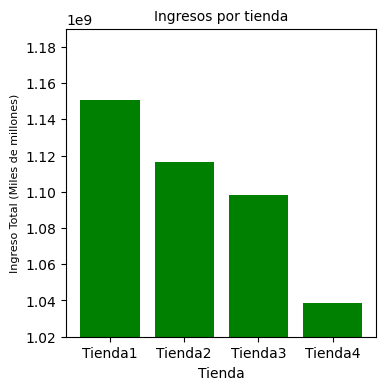

In [ ]:
##Visualizacion de graficos:
##Ventas totales 1038375700
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.bar(x=resultados_ventas["Tienda"],height=resultados_ventas["Ingreso Total"],color="green")
plt.title('Ingresos por tienda', fontsize=10)
plt.ylim(1020000000, 1190000000)
plt.xlabel('Tienda', fontsize=10)
plt.ylabel('Ingreso Total (Miles de millones)', fontsize=8)

(3.96, 4.06)

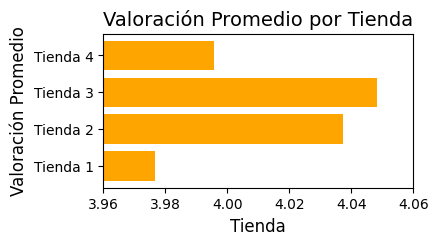

In [ ]:
#Valoracion de la tienda
plt.figure(figsize=(4, 2))
plt.barh(calificacion_clientes['Tienda'], calificacion_clientes['Calificacion'],  color='orange', linestyle='-', linewidth=1)

plt.title('Valoración Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Valoración Promedio', fontsize=12)
plt.xlim(3.96, 4.06)

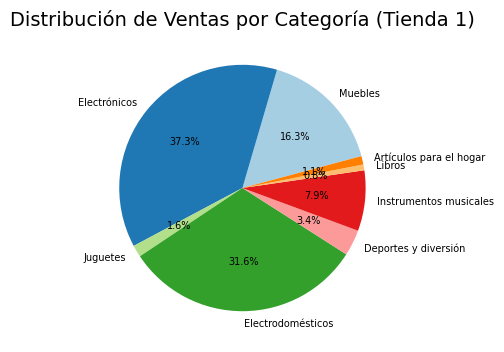

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
tienda_1_resultados = df_resultados[df_resultados['Tienda'] == 'Tienda 1']
plt.figure(figsize=(4, 4))
plt.pie(tienda_1_resultados['ventas_categoria_tienda'],
        labels=tienda_1_resultados['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=15,
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 7})
plt.title('Distribución de Ventas por Categoría (Tienda 1)', fontsize=14)
plt.show()


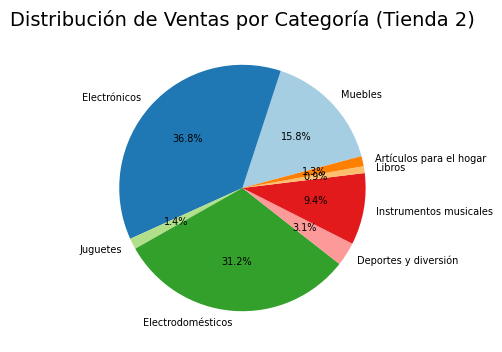

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
tienda_2_resultados = df_resultados[df_resultados['Tienda'] == 'Tienda 2']
plt.figure(figsize=(4, 4))
plt.pie(tienda_2_resultados['ventas_categoria_tienda'],
        labels=tienda_2_resultados['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=15,
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 7})
plt.title('Distribución de Ventas por Categoría (Tienda 2)', fontsize=14)
plt.show()

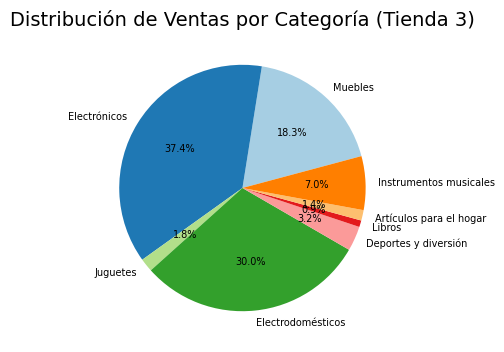

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
tienda_3_resultados = df_resultados[df_resultados['Tienda'] == 'Tienda 3']
plt.figure(figsize=(4, 4))
plt.pie(tienda_3_resultados['ventas_categoria_tienda'],
        labels=tienda_3_resultados['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=15,
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 7})
plt.title('Distribución de Ventas por Categoría (Tienda 3)', fontsize=14)
plt.show()

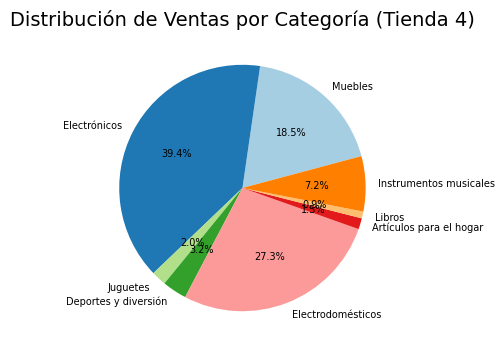

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
tienda_4_resultados = df_resultados[df_resultados['Tienda'] == 'Tienda 4']
plt.figure(figsize=(4, 4))
plt.pie(tienda_4_resultados['ventas_categoria_tienda'],
        labels=tienda_4_resultados  ['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=15,
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 7})
plt.title('Distribución de Ventas por Categoría (Tienda 4)', fontsize=14)
plt.show()

# **Informe final**
Despues de un analisis completo en cada una de las tiendas se pudieron realizar 5 principales operaciones. La primera involucró el total de ventas realizado por cada tienda donde la tienda 1 demostro ser la que mas dinero genera en ventas con ingresos de 1,150,880,400.
La tienda que menos ventas tuvo es la tienda 4 con 1,038,375,700.
Tambien se debe de señalar que en las 4 sucursales la categoria de producto que domino fue la de los electronicos. Las tiendas tiene una media de calificacion de 4 estrellas. El producto mas vendido es un curso de "Iniciando programacion" y el que menos se vendio fue Juegos de mesa. El costo de envio mas alto lo tiene la tienda 1, el promedio de envio entre las 4 tiendas es de 24,874. En el presente documento de pueden apreciar los graficos tanto de ingresos , calificacion del cliente y categorias vendidas en cada tienda. Teniendo en cuenta todos estos datos, se puede apreciar que la tienda que menos dinero genera es la tienda 4 ya que esta por debajo de los ingresos de las demas, ademas de que es la segunda con calificaciones mas bajas. Mi conclusion es que la diferencia de dinero y de calificacion no es tan grande como si se tratase de una quiebra o mala administracion que haga que la tienda se encuentre en condiciones insostenibles por lo que ninguna tienda es candidata a ser vendida si la consideramos como una mala inversion a futuro, sin enbargo debido a la demanda que usted me hizo para analizar cual esta por debajo las demas y cual es la candidata a ser vendida, mi enfoque y los datos apuntan a que la TIENDA 4 es la que menos repercucion tiene.
Gracias.